In [ ]:
import numpy as np

def taylor_sin(x, n=5):
    """Compute the Taylor expansion of sin(x) around x=0 up to order n."""
    res = 0
    for i in range(n):
        res += ((-1)**i / np.math.factorial(2*i + 1)) * x**(2*i + 1)
    return res

# Generate a dataset of input-output pairs
X_train = np.linspace(-np.pi, np.pi, 1000)
y_train = np.array([taylor_sin(x) for x in X_train])


In [ ]:
n_steps = 10

def prepare_data(X, y, n_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - n_steps):
        X_seq.append(X[i:i+n_steps])
        y_seq.append(y[i:i+n_steps])
    return np.array(X_seq), np.array(y_seq)

# Prepare the training data
X_train_seq, y_train_seq = prepare_data(X_train, y_train, n_steps)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [ ]:
# Train the model
model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32)


Epoch 1/100
31/31 [==============================] - 2s 8ms/step - loss: 0.2690
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 0.1558
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 0.1102
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0477
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 4.7194e-04
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 2.3293e-04
Epoch 8/100
31/31 [==============================] - 0s 8ms/step - loss: 1.7432e-04
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 1.7085e-04
Epoch 10/100
31/31 [==============================] - 0s 8ms/step - loss: 1.6789e-04
Epoch 11/100
31/31 [==============================] - 0s 8ms/step - loss: 1.6644e-04
Epoch 12/100
31/31 [==============================] - 0s 10ms/step - loss: 1.6641e-04
Epoch 13

3/3 [==============================] - 0s 8ms/step


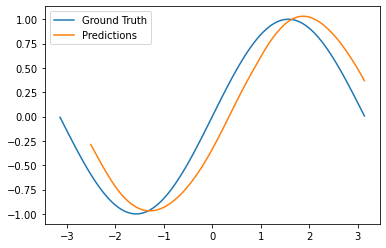

In [ ]:
import matplotlib.pyplot as plt

# Generate predictions
X_test = np.linspace(-np.pi, np.pi, 100)
y_test = np.array([taylor_sin(x) for x in X_test])
X_test_seq, y_test_seq = prepare_data(X_test, y_test, n_steps)
y_pred_seq = model.predict(X_test_seq)

# Plot the results
plt.plot(X_test, y_test, label='Ground Truth')
plt.plot(X_test[n_steps:], y_pred_seq[:, -1], label='Predictions')
plt.legend()
plt.show()
